In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F8EF47C3340>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


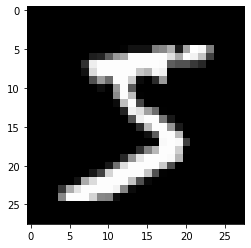

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


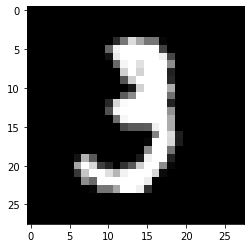

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


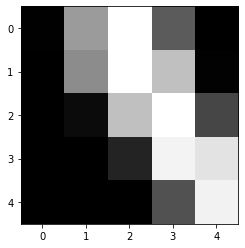

In [14]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [15]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [16]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [17]:
import torch.nn as nn

input_size = 28*28
num_classes = 10


model = nn.Linear(input_size, num_classes)

In [18]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0198, -0.0258, -0.0340,  ..., -0.0015,  0.0031, -0.0287],
        [-0.0140, -0.0059, -0.0070,  ..., -0.0180, -0.0226,  0.0155],
        [ 0.0149, -0.0113,  0.0086,  ...,  0.0281,  0.0277,  0.0098],
        ...,
        [ 0.0191, -0.0260, -0.0014,  ..., -0.0035, -0.0089,  0.0097],
        [ 0.0249,  0.0146, -0.0116,  ..., -0.0008,  0.0262, -0.0167],
        [ 0.0029,  0.0240,  0.0123,  ...,  0.0323, -0.0052,  0.0212]],
       requires_grad=True)

In [19]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0344, -0.0297, -0.0138, -0.0268, -0.0012, -0.0134, -0.0101, -0.0251,
        -0.0095,  0.0025], requires_grad=True)

In [20]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([3, 9, 5, 7, 7, 1, 5, 8, 7, 1, 1, 2, 5, 4, 4, 7, 4, 9, 6, 6, 6, 9, 1, 8,
        8, 0, 2, 7, 4, 0, 2, 8, 0, 9, 0, 3, 7, 2, 1, 3, 7, 2, 3, 6, 1, 2, 9, 0,
        2, 8, 7, 9, 4, 8, 5, 7, 7, 5, 2, 7, 5, 2, 1, 2, 4, 1, 4, 4, 9, 8, 4, 1,
        4, 4, 1, 6, 4, 1, 5, 0, 8, 9, 1, 9, 3, 7, 7, 3, 0, 7, 1, 3, 9, 8, 1, 3,
        8, 9, 4, 5, 1, 9, 7, 1, 4, 1, 9, 8, 8, 4, 1, 2, 7, 7, 1, 7, 6, 6, 5, 1,
        6, 5, 1, 4, 7, 1, 0, 3])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [ ]:
images.shape

In [21]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [22]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [23]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [24]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0016, -0.0099, -0.0352,  ..., -0.0039,  0.0059, -0.0313],
         [ 0.0153, -0.0143,  0.0227,  ...,  0.0029,  0.0194,  0.0139],
         [ 0.0017, -0.0262,  0.0136,  ...,  0.0061, -0.0317,  0.0041],
         ...,
         [ 0.0206,  0.0123,  0.0045,  ..., -0.0236,  0.0327,  0.0090],
         [-0.0294, -0.0334,  0.0320,  ..., -0.0160,  0.0150,  0.0313],
         [-0.0303, -0.0228, -0.0039,  ..., -0.0099,  0.0088, -0.0241]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0346, -0.0060,  0.0216,  0.0270,  0.0051,  0.0008, -0.0185,  0.0081,
          0.0147, -0.0222], requires_grad=True)]

In [25]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:3].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.1902, -0.2411,  0.0686, -0.2469,  0.1724,  0.0542, -0.0366, -0.2625,
          0.0245, -0.4584],
        [-0.0550, -0.1171,  0.0370, -0.3789,  0.1615,  0.2811,  0.1288, -0.1631,
          0.1135, -0.2314],
        [-0.0065, -0.1153, -0.1993,  0.1308,  0.1441,  0.1788, -0.1081, -0.1439,
         -0.0444, -0.0381]])


In [26]:
import torch.nn.functional as F

In [27]:
outputs[:2]

tensor([[-0.1902, -0.2411,  0.0686, -0.2469,  0.1724,  0.0542, -0.0366, -0.2625,
          0.0245, -0.4584],
        [-0.0550, -0.1171,  0.0370, -0.3789,  0.1615,  0.2811,  0.1288, -0.1631,
          0.1135, -0.2314]], grad_fn=<SliceBackward0>)

In [28]:
probs = F.softmax(outputs, dim=1)


print("Sample probabilities:\n", probs[:2].data)


print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0909, 0.0864, 0.1177, 0.0859, 0.1306, 0.1160, 0.1060, 0.0845, 0.1126,
         0.0695],
        [0.0950, 0.0893, 0.1042, 0.0687, 0.1180, 0.1330, 0.1142, 0.0853, 0.1125,
         0.0797]])
Sum:  0.9999999403953552


In [29]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 5, 5, 5, 4, 5, 5, 5, 4, 4, 4, 4, 5, 4, 0, 5, 4, 4, 5, 5, 5, 3, 3, 5,
        4, 1, 9, 5, 5, 8, 5, 5, 4, 5, 5, 5, 3, 4, 3, 5, 1, 5, 3, 3, 4, 4, 4, 4,
        5, 4, 5, 4, 4, 4, 5, 4, 5, 4, 4, 7, 4, 4, 5, 5, 8, 0, 0, 4, 5, 4, 5, 6,
        3, 3, 4, 5, 5, 4, 4, 4, 5, 3, 3, 4, 5, 3, 3, 5, 5, 0, 4, 2, 5, 5, 9, 5,
        5, 6, 4, 4, 4, 5, 5, 5, 5, 3, 4, 4, 5, 5, 4, 9, 5, 5, 4, 5, 4, 2, 5, 4,
        4, 1, 5, 4, 3, 4, 5, 5])
tensor([0.1306, 0.1330, 0.1211, 0.1171, 0.1313, 0.1328, 0.1222, 0.1428, 0.1289,
        0.1447, 0.1227, 0.1419, 0.1372, 0.1531, 0.1189, 0.1505, 0.1510, 0.1805,
        0.1332, 0.1211, 0.1250, 0.1285, 0.1294, 0.1665, 0.1457, 0.1183, 0.1299,
        0.1411, 0.1284, 0.1329, 0.1272, 0.1206, 0.1251, 0.1347, 0.1177, 0.1516,
        0.1222, 0.1772, 0.1391, 0.1334, 0.1159, 0.1348, 0.1170, 0.1142, 0.1730,
        0.1470, 0.1219, 0.1285, 0.1365, 0.1195, 0.1303, 0.1147, 0.1707, 0.1296,
        0.1353, 0.1221, 0.1345, 0.1512, 0.1290, 0.1180, 0.1152, 0.1510, 0.1160,
       

In [30]:
labels


tensor([6, 0, 2, 6, 4, 7, 1, 1, 3, 7, 9, 7, 5, 6, 0, 7, 2, 6, 4, 1, 3, 1, 1, 7,
        0, 3, 5, 0, 8, 8, 7, 0, 4, 3, 3, 7, 8, 4, 7, 1, 9, 7, 8, 3, 2, 3, 9, 2,
        0, 9, 1, 4, 9, 2, 7, 8, 8, 4, 9, 0, 9, 9, 4, 1, 0, 6, 1, 4, 0, 5, 7, 9,
        8, 8, 3, 0, 9, 9, 4, 2, 1, 6, 1, 1, 0, 5, 7, 1, 7, 0, 2, 2, 7, 7, 3, 9,
        1, 2, 3, 4, 2, 0, 7, 1, 4, 8, 7, 8, 2, 7, 8, 3, 8, 7, 8, 6, 2, 4, 0, 3,
        3, 8, 5, 2, 8, 4, 0, 4])

In [31]:
outputs[:2]

tensor([[-0.1902, -0.2411,  0.0686, -0.2469,  0.1724,  0.0542, -0.0366, -0.2625,
          0.0245, -0.4584],
        [-0.0550, -0.1171,  0.0370, -0.3789,  0.1615,  0.2811,  0.1288, -0.1631,
          0.1135, -0.2314]], grad_fn=<SliceBackward0>)

In [32]:
torch.sum(preds == labels)

tensor(16)

In [33]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [34]:
accuracy(outputs, labels)

tensor(0.1250)

In [35]:
probs

tensor([[0.0909, 0.0864, 0.1177,  ..., 0.0845, 0.1126, 0.0695],
        [0.0950, 0.0893, 0.1042,  ..., 0.0853, 0.1125, 0.0797],
        [0.1006, 0.0902, 0.0830,  ..., 0.0877, 0.0968, 0.0975],
        ...,
        [0.1000, 0.1058, 0.0770,  ..., 0.0839, 0.0771, 0.0964],
        [0.1100, 0.1229, 0.0895,  ..., 0.0890, 0.0985, 0.0874],
        [0.0819, 0.0990, 0.1045,  ..., 0.0948, 0.0901, 0.0867]],
       grad_fn=<SoftmaxBackward0>)

In [36]:
outputs

tensor([[-0.1902, -0.2411,  0.0686,  ..., -0.2625,  0.0245, -0.4584],
        [-0.0550, -0.1171,  0.0370,  ..., -0.1631,  0.1135, -0.2314],
        [-0.0065, -0.1153, -0.1993,  ..., -0.1439, -0.0444, -0.0381],
        ...,
        [ 0.0093,  0.0658, -0.2525,  ..., -0.1658, -0.2505, -0.0278],
        [ 0.1270,  0.2381, -0.0798,  ..., -0.0855,  0.0164, -0.1037],
        [-0.2946, -0.1048, -0.0508,  ..., -0.1484, -0.1989, -0.2380]],
       grad_fn=<AddmmBackward0>)

In [37]:
loss_fn = F.cross_entropy

In [38]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2996, grad_fn=<NllLossBackward0>)


In [43]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] 
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [44]:
l1 = [1, 2, 3, 4, 5]

In [45]:
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [46]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [50]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generating predictions
        loss = F.cross_entropy(out, labels) # Calculating loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generating predictions
        loss = F.cross_entropy(out, labels)   # Calculating loss
        acc = accuracy(out, labels)           # Calculating accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [51]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3134536743164062, 'val_acc': 0.12440664321184158}

In [52]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9445, val_acc: 0.6385
Epoch [1], val_loss: 1.6759, val_acc: 0.7428
Epoch [2], val_loss: 1.4762, val_acc: 0.7664
Epoch [3], val_loss: 1.3260, val_acc: 0.7830
Epoch [4], val_loss: 1.2105, val_acc: 0.7952


In [53]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1197, val_acc: 0.8050
Epoch [1], val_loss: 1.0468, val_acc: 0.8113
Epoch [2], val_loss: 0.9871, val_acc: 0.8172
Epoch [3], val_loss: 0.9373, val_acc: 0.8224
Epoch [4], val_loss: 0.8952, val_acc: 0.8278


In [54]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8591, val_acc: 0.8326
Epoch [1], val_loss: 0.8277, val_acc: 0.8361
Epoch [2], val_loss: 0.8002, val_acc: 0.8396
Epoch [3], val_loss: 0.7759, val_acc: 0.8414
Epoch [4], val_loss: 0.7542, val_acc: 0.8438


In [55]:
history4 = fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7347, val_acc: 0.8457
Epoch [1], val_loss: 0.7172, val_acc: 0.8474
Epoch [2], val_loss: 0.7012, val_acc: 0.8492
Epoch [3], val_loss: 0.6866, val_acc: 0.8515
Epoch [4], val_loss: 0.6732, val_acc: 0.8528
Epoch [5], val_loss: 0.6609, val_acc: 0.8543
Epoch [6], val_loss: 0.6495, val_acc: 0.8560
Epoch [7], val_loss: 0.6389, val_acc: 0.8577
Epoch [8], val_loss: 0.6291, val_acc: 0.8589
Epoch [9], val_loss: 0.6199, val_acc: 0.8592


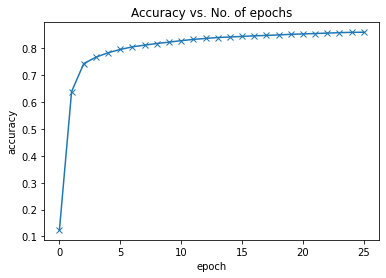

In [56]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [57]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


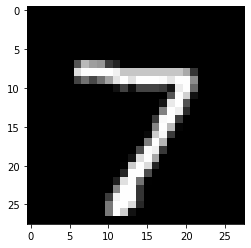

In [58]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [59]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


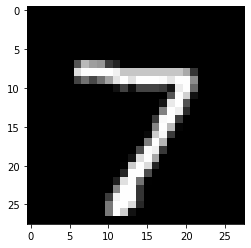

In [60]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


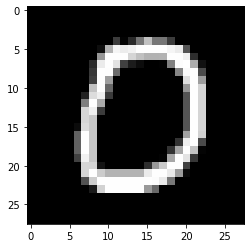

In [61]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


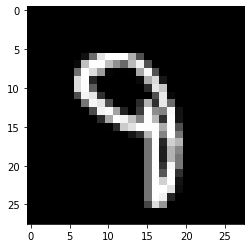

In [62]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


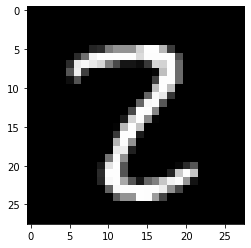

In [63]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 1 , Predicted: 1


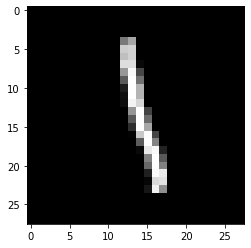

In [64]:
img, label = test_dataset[189]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 3 , Predicted: 3


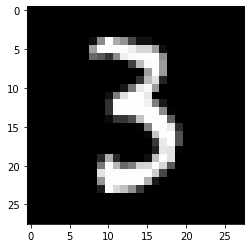

In [65]:
img, label = test_dataset[1539]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 8 , Predicted: 3


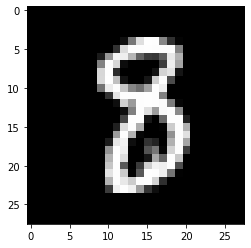

In [66]:
img, label = test_dataset[1219]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [67]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5891129374504089, 'val_acc': 0.8666015863418579}

In [68]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [69]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 5.2306e-03,  3.0972e-02, -1.3440e-02,  ..., -2.1947e-02,
                       -2.5387e-04,  2.8208e-02],
                      [-3.3842e-03,  1.7860e-02, -3.2980e-02,  ...,  3.5243e-02,
                       -3.7374e-03, -1.2441e-02],
                      [-3.3185e-02, -3.4328e-02, -3.7770e-03,  ...,  3.4962e-02,
                        2.6233e-02, -9.4764e-03],
                      ...,
                      [-2.4179e-02,  1.8332e-02,  1.6413e-02,  ..., -2.0281e-02,
                        2.1680e-02,  3.8600e-04],
                      [-2.2503e-03, -8.4562e-05, -1.2132e-02,  ..., -3.4568e-02,
                       -1.6775e-02, -1.8599e-02],
                      [-2.9928e-02,  1.7788e-02,  8.0988e-04,  ...,  2.4938e-02,
                       -1.2329e-02, -7.2898e-03]])),
             ('linear.bias',
              tensor([-0.0475,  0.0861, -0.0213,  0.0044,  0.0565,  0.0504,  0.0243,  0.0505,
                      -0.1316,

In [70]:
model2 = MnistModel()

In [71]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-2.7970e-02, -3.5047e-02,  1.3743e-02,  ..., -2.9870e-02,
                       -1.6945e-02,  2.6352e-02],
                      [ 3.5127e-02,  2.2180e-03,  1.6983e-02,  ..., -1.7140e-02,
                       -3.2650e-02,  3.4751e-02],
                      [-2.4890e-02, -7.8549e-03, -2.8087e-05,  ..., -1.1269e-02,
                        6.5172e-03,  1.4461e-03],
                      ...,
                      [ 1.4221e-02,  1.2875e-02,  1.8418e-02,  ...,  2.1753e-02,
                        2.5198e-02, -2.0842e-02],
                      [-2.7248e-02,  3.0941e-02,  1.4287e-02,  ...,  1.0361e-02,
                        1.6466e-03, -7.5649e-03],
                      [-1.3845e-02,  2.0940e-02, -3.5689e-02,  ..., -2.1849e-02,
                        3.3927e-02,  3.1519e-02]])),
             ('linear.bias',
              tensor([ 0.0221, -0.0229,  0.0004,  0.0020,  0.0270,  0.0211, -0.0225,  0.0058,
                       0.0158,

In [72]:
evaluate(model2, test_loader)

{'val_loss': 2.288782835006714, 'val_acc': 0.15664061903953552}

In [73]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 5.2306e-03,  3.0972e-02, -1.3440e-02,  ..., -2.1947e-02,
                       -2.5387e-04,  2.8208e-02],
                      [-3.3842e-03,  1.7860e-02, -3.2980e-02,  ...,  3.5243e-02,
                       -3.7374e-03, -1.2441e-02],
                      [-3.3185e-02, -3.4328e-02, -3.7770e-03,  ...,  3.4962e-02,
                        2.6233e-02, -9.4764e-03],
                      ...,
                      [-2.4179e-02,  1.8332e-02,  1.6413e-02,  ..., -2.0281e-02,
                        2.1680e-02,  3.8600e-04],
                      [-2.2503e-03, -8.4562e-05, -1.2132e-02,  ..., -3.4568e-02,
                       -1.6775e-02, -1.8599e-02],
                      [-2.9928e-02,  1.7788e-02,  8.0988e-04,  ...,  2.4938e-02,
                       -1.2329e-02, -7.2898e-03]])),
             ('linear.bias',
              tensor([-0.0475,  0.0861, -0.0213,  0.0044,  0.0565,  0.0504,  0.0243,  0.0505,
                      -0.1316,

In [74]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.5891129374504089, 'val_acc': 0.8666015863418579}